# Project Group 6: Diamonds Price Relationship Analysis
- Lee Song Wei Lawrence
- Wang Bo
- Wen Yao Hao
- Zeng Cheng Jia Li

## Contents Page

- 1) Problem Statement
- 2) Importing Libraries & Dataset
- 3) Exploratory data analysis (EDA) & Data-cleaning
- 4) Initial visual investigation of relationships
- 5) Categorical Data - the 4 'C's of buying a diamond
- 6) Observed Price relationships based on carat size
- 7) Numerical Data
- 8) Conclusions
- 9) Machine Learning (Not Assessed)
- 10) References
- 11) Appendix
- 12) Contribution Statement

## 1) Problem Statement: 
Diamonds are very roughly priced according to their carat weight. However, there are many more factors influencing price like cut, color and clarity (ie categorical data). Utilizing python techniques, we launched an investigation to dissect the true relationship of these factors with price for each diamond in the dataset.

This dataset also provides numerical data based on the physical dimension of a diamond which affects the refractivity of light and hence how dazzling a diamond appears to be. Again, application of skills learnt from our lessons could be used to sift out connections to relationships affecting price.

Through our research, we noticed that different ranges of carat sizes illustrated different relationships which led us to wonder about the usage of diamonds depending on their sizes. This led us to segment the dataset by carat size which allowed us to dive deeper to uncover which parameters had more importance for each size segment.

Our original concept was to conduct a predictive study using machine learning to see if we can determine the importance of each factor influencing the price of a diamond. Machine learning will not be assessed but we included the portion on machine learning as a reference for our future projects.

Data from: https://www.kaggle.com/shivam2503/diamonds

## 2) Importing Libraries & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import requests
from bs4 import BeautifulSoup as bs

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option("max_colwidth",300)

In [2]:
data = pd.read_csv("diamonds.csv")

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0           1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1           2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2           3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3           4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4           5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
5           6   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94   
6           7   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95   
7           8   0.26  Very Good     H     SI1   61.9   55.0    337  4.07   
8           9   0.22       Fair     E     VS2   65.1   61.0    337  3.87   
9          10   0.23  Very Good     H     VS1   59.4   61.0    338  4.00   

      y     z  
0  3.98  2.43  
1  3.84  2.31  
2  4.07  2.31  
3  4.23  2.63  
4  4.35  2.75  
5  3.96  2.48  
6  3.98  2.47  
7  4.11  2.53  
8  3.78  2.49  
9  4.05  2.39

In [5]:
data.shape

(53940, 11)

#### COLUMNS DESCRIPTION (from kaggle.com)
Note: A mix of numerical & categorical data
- Index counter: Unnamed: 0 (To be dropped?)
- Price: the price of the diamond
- Carat: Carat weight of the diamond


Categorical Data:
- Cut: Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal. 
- Color: Color of the diamond, with D being the best and J the worst
- Clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1,


Numerical Data: Dimensions of a diamond.
- x: length mm
- y: width mm
- z: depth mm
- Depth: depth %: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- Table: table%: The width of the diamond's table expressed as a percentage of its average diameter

In [6]:
data.describe()

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

## 3) Exploratory data analysis (EDA) & data-cleaning

In [7]:
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
data = data.drop(["Unnamed: 0"], axis=1)

In [9]:
data.describe()    # There are minimum values of x, y & z given as zero. This is not possible

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

We remove data containing any zeroes for x, y and z.

In [10]:
data['x'][(data['x']<=0) ] = None

In [11]:
data['z'][(data['z']<=0) ] = None

In [12]:
data = data.dropna()

In [13]:
data.describe()    # There are no longer minimum values as zero for x, y & z

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [14]:
data.shape    # We dropped 20 rows/observations

(53920, 10)

Zero errors were easy to find - but how about outliers on the other end of the spectrum? These are tougher to assess and remove

In [15]:
from sklearn.ensemble import IsolationForest
model = IsolationForest(contamination=float(.12))
model.fit(data[["x","y","z"]])

IsolationForest(behaviour='old', bootstrap=False, contamination=0.12,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

C:\Users\leela\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


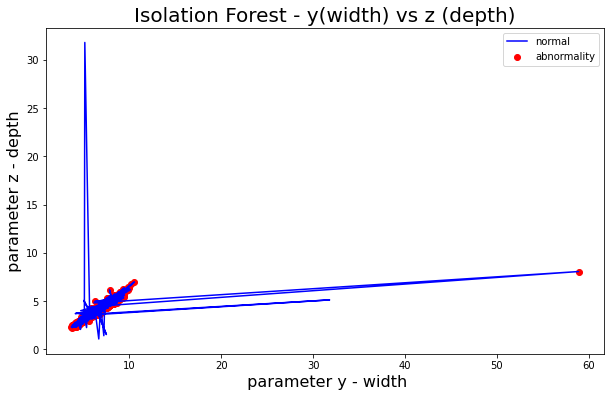

In [16]:
data["anomaly2"] = pd.Series(model.predict(data[["x", "y", "z"]]))
fig, ax = plt.subplots(figsize=(10,6))
a = data.loc[data["anomaly2"] == -1, ["y", "z"]]
ax.plot(data["y"], data["z"], color = "blue", label = 'normal')
ax.scatter(a["y"], a["z"], color = "red", label = "abnormality")
plt.xlabel(" parameter y - width", size = 16)
plt.ylabel(" parameter z - depth ", size = 16)
plt.title("Isolation Forest - y(width) vs z (depth)", size = 20)
plt.legend()
plt.show()

In [17]:
data = data.drop(["anomaly2"], axis=1)     # remove column - not needed for rest of project

In [18]:
data.loc[(data['x']==10.74) | (data['y']==58.90) | (data['z']==31.80)]     
# Are these possible? 

carat        cut color clarity  depth  table  price      x      y  \
24067   2.00    Premium     H     SI2   58.9   57.0  12210   8.09  58.90   
27415   5.01       Fair     J      I1   65.5   59.0  18018  10.74  10.54   
48410   0.51  Very Good     E     VS1   61.8   54.7   1970   5.12   5.15   

           z  
24067   8.06  
27415   6.98  
48410  31.80

We thought of another way to check for outliers via creating a new column called "Volume" which is the product of each diamond's length, width & height. 

In [19]:
data["volume"] = data["x"] * data["y"] * data["z"]

In [20]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

      volume  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

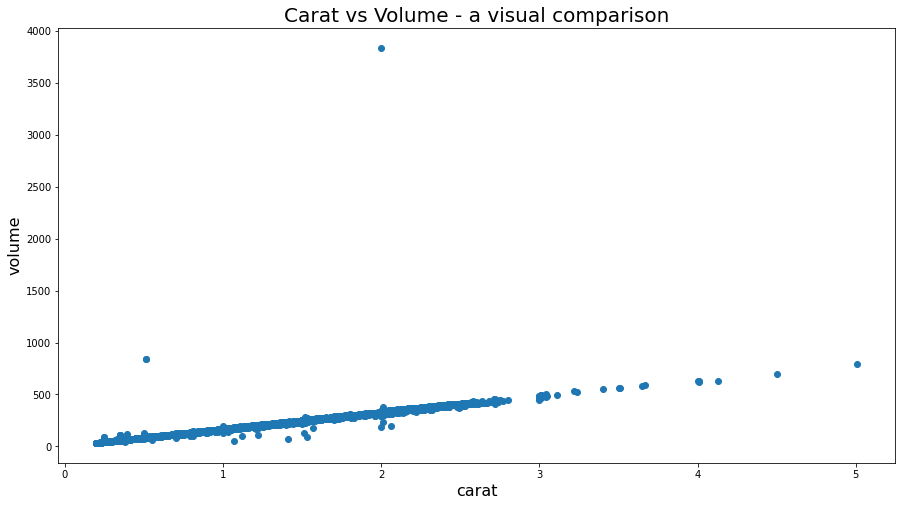

In [21]:
plt.figure(figsize=(15,8))
plt.xlabel("carat", size = 16)
plt.ylabel("volume", size = 16)
plt.title("Carat vs Volume - a visual comparison", size = 20)
plt.scatter(x= data["carat"], y= data["volume"])
plt.show()

This scatterplot of carat vs volume should be highly correlated. Outliers are obviously errors and should be removed from the dataset.

In [22]:
data["volume"].describe()

count    53920.000000
mean       129.897567
std         78.219789
min         31.707984
25%         65.189759
50%        114.840180
75%        170.846415
max       3840.598060
Name: volume, dtype: float64

In [23]:
data.loc[data["volume"] > 800]                     # these are the outliers we want to remove.

carat        cut color clarity  depth  table  price     x      y  \
24067   2.00    Premium     H     SI2   58.9   57.0  12210  8.09  58.90   
48410   0.51  Very Good     E     VS1   61.8   54.7   1970  5.12   5.15   
49189   0.51      Ideal     E     VS1   61.8   55.0   2075  5.15  31.80   

           z      volume  
24067   8.06  3840.59806  
48410  31.80   838.50240  
49189   5.12   838.50240

In [24]:
data['volume'][(data['volume']>800) ] = None

In [25]:
data = data.dropna()

In [26]:
data.shape    # We dropped another 3 rows/observations

(53917, 11)

## 4) Initial visual investigation on relationships

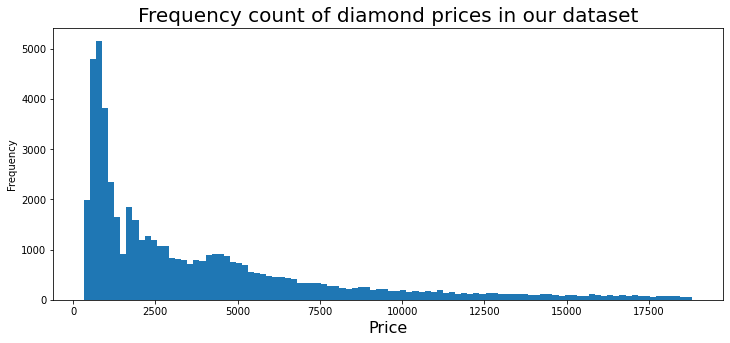

In [27]:
plt.figure(figsize=(12,5))
plt.xlabel("Price", size = 16)
plt.title("Frequency count of diamond prices in our dataset", size = 20)
data.price.plot(kind = "hist", bins = 100)
plt.show()

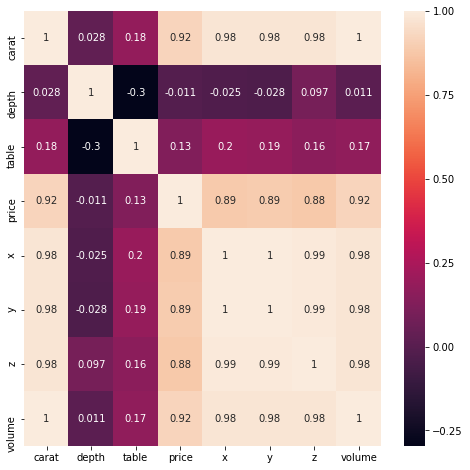

In [28]:
plt.figure(figsize=(8,8))
corrMatrix = data.corr()                     # simple correlation matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()

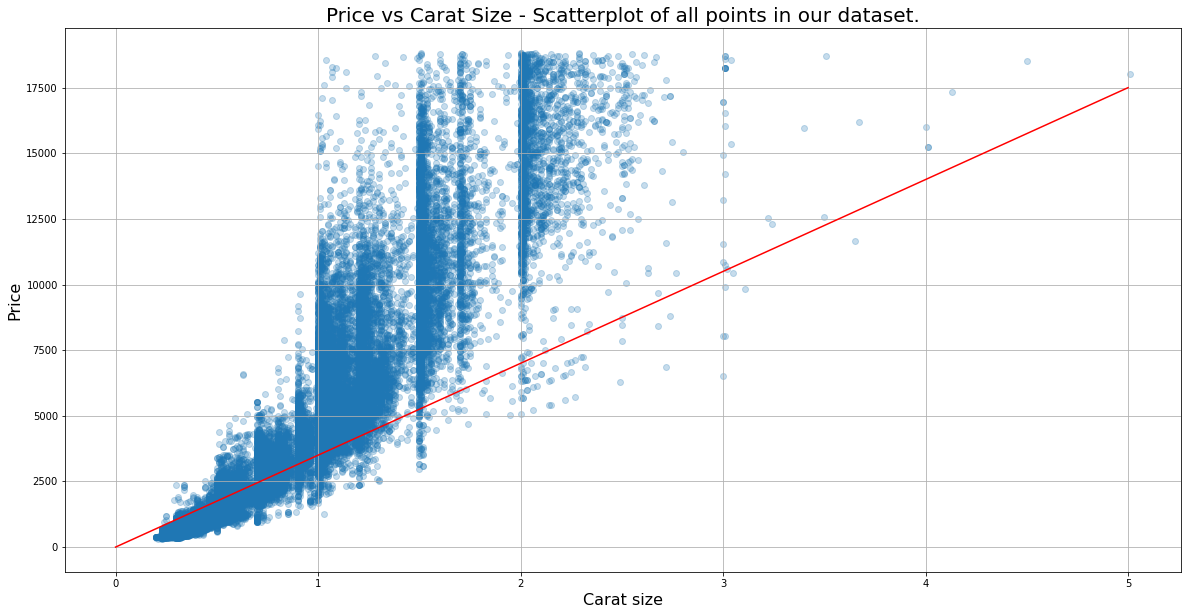

In [29]:
plt.figure(figsize=(20,10))
plt.ylabel("Price", size = 16)
plt.xlabel("Carat size", size = 16)
plt.title("Price vs Carat Size - Scatterplot of all points in our dataset.", size = 20)
plt.scatter(x = data['carat'], y=data['price'], alpha = 0.25)

x = np.linspace(0,5,100)
y = 3500*x
plt.plot(x,y, "r")
plt.grid()

plt.show()

We can expect a bigger carat sized diamond to be worth more and that is indeed the `general` relation. We import a graphical reference scale for carat size and how they compare against a standard US quarter. 

In [30]:
url1 = "https://www.diamonds.pro/education/carat-weight/"
response = requests.get(url1)
response
soup = bs(response.text)
link = soup.find(class_="col-main content").find_all("p")[10].find("a")["href"]
Image(url=link)

But what are the other factors that contribute to price? And how much does each factor actually contribute to the price? The pairplot below provides an initial visual summary to the relationships we can investigate.

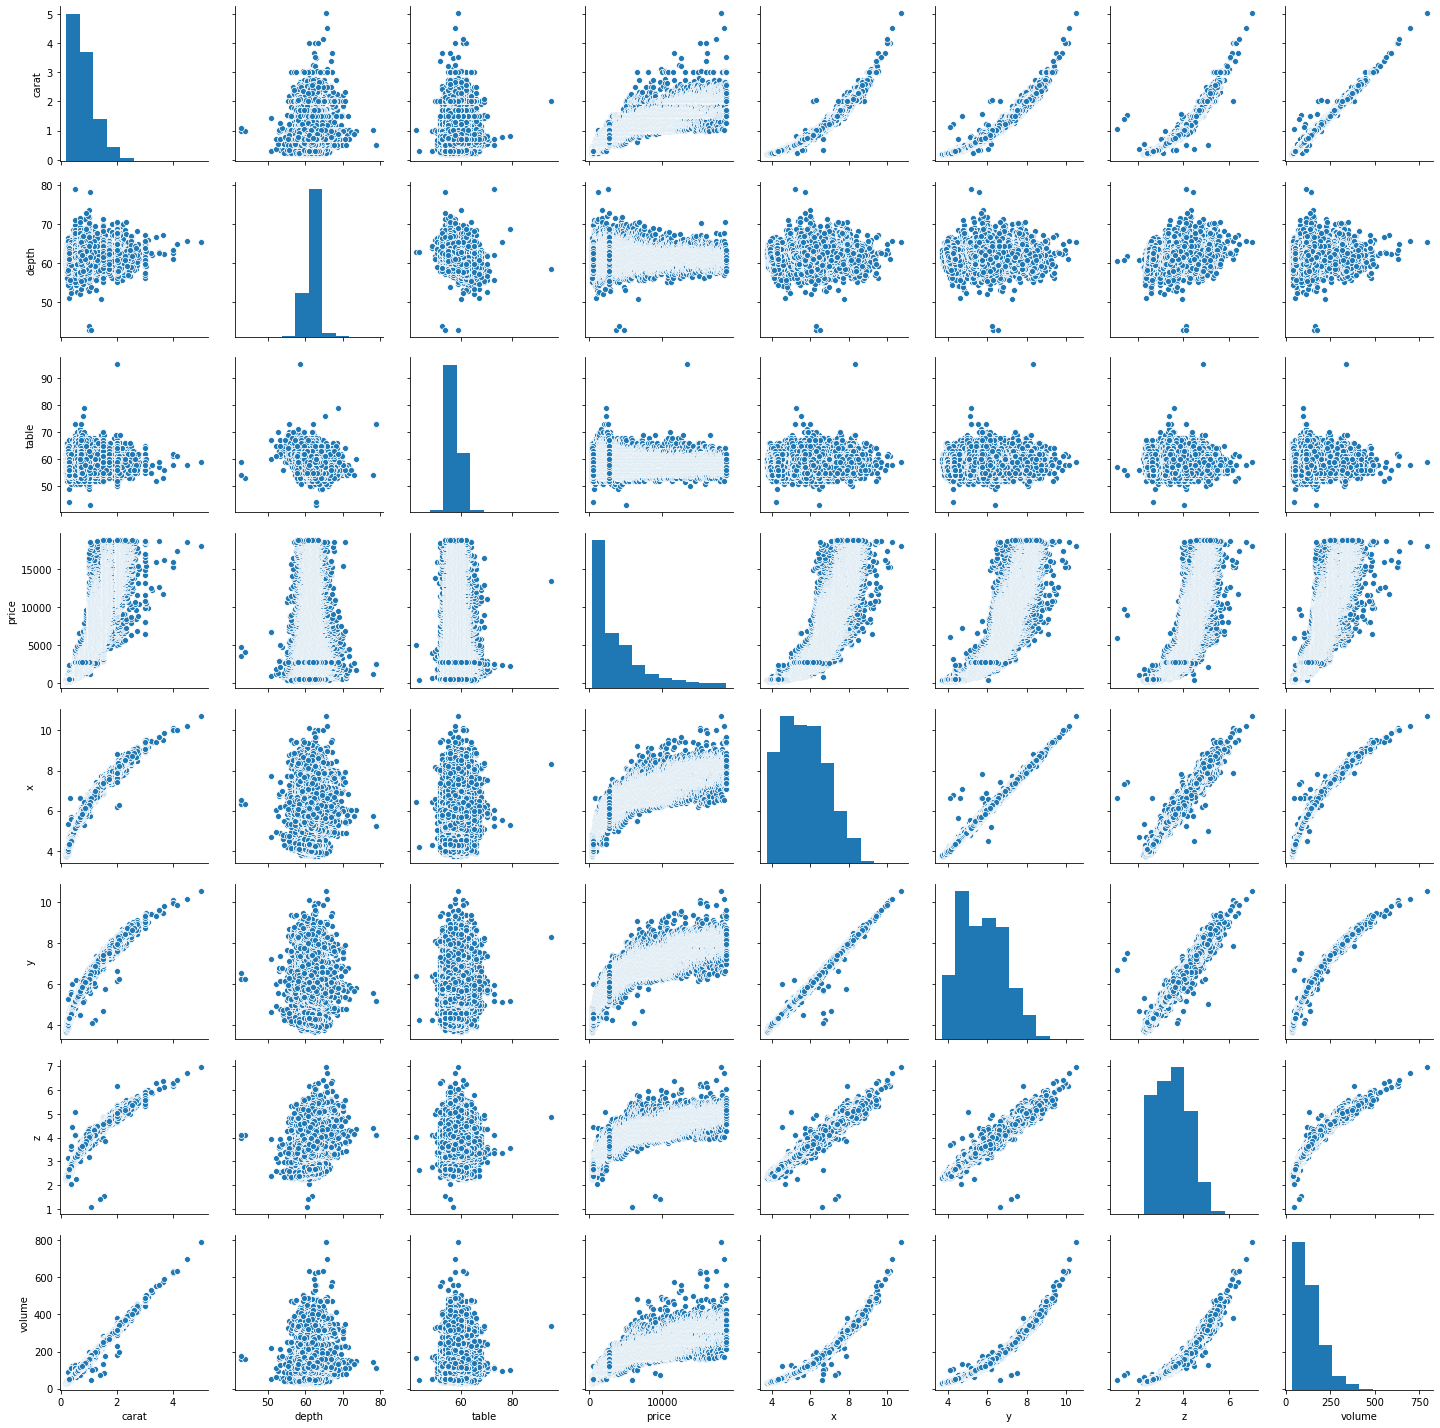

In [31]:
sns.pairplot(data)

## 5) Categorical Data - the 4 'C's of buying a diamond

We often hear about the 4 'C's of buying a diamond. Carat size is the easiest to understand but how about the other 3 'C's? The information below was scraped from various websites and will help us to figure out the relationships better.

### 5.1) Cut

In [32]:
url2 = "https://www.loosediamondsreviews.com/diamondcut.html"
response = requests.get(url2)
response
page2 = response.text
soup2 = bs(page2)

In [33]:
grade = soup2.find(text = "Cut grading")
print(str(grade.next.next.next).split("\r")[0])

Diamonds are graded into the following cuts: 


In [34]:
for r in soup2.find("table").find_all("li")[28:34]:
    print(r.text)

Ideal cut
Premium cut
Very Good (or Fine) cut
Good cut
Fair cut
Poor cut


- There are officially 6 grades of Cut including a grade called 'poor' but our dataset does not have any observations in this grade.

In [35]:
data.groupby(["cut"])["price"].count()

cut
Fair          1609
Good          4902
Ideal        21547
Premium      13779
Very Good    12080
Name: price, dtype: int64

A quick visualisation of `Cut` of the diamonds in our dataset using catplot

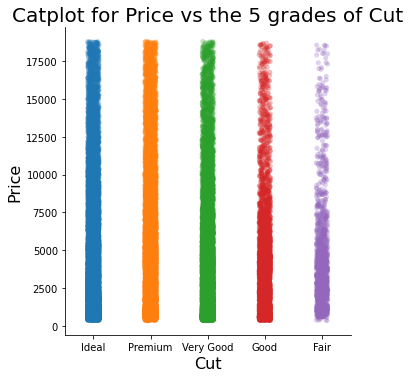

In [36]:
cut_order = ["Ideal", "Premium", "Very Good", "Good", "Fair"]
sns.catplot(x="cut", y="price", data=data, alpha = 0.3, order = cut_order)
plt.title("Catplot for Price vs the 5 grades of Cut", size = 20)
plt.xlabel("Cut", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

This catplot for Cut shows a basic visual that in the `Fair` category, prices are mostly concentrated in the lower price range and fewer diamonds with high prices with a 'thinning' effect as we get to the higher price range.

There is a similar 'thinning' effect in the `Good` category but less visible whilst the top 3 grades of `Ideal, Premium & Very Good` do not show this effect. 

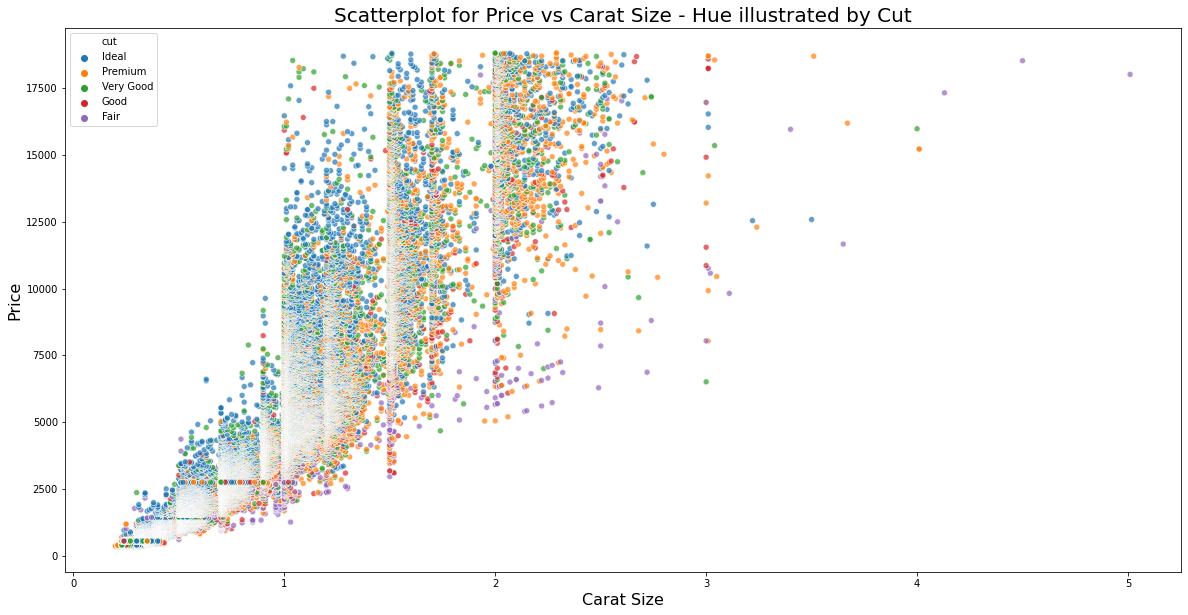

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data['carat'], y=data['price'], alpha = 0.7, hue = data['cut'], hue_order = cut_order)
plt.title("Scatterplot for Price vs Carat Size - Hue illustrated by Cut", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The scatterplot above employs `Hue` to illustrate the different 'Cut' grading by using various shades of colors. There seems to be an observable relation that the highest 3 grades of Ideal, Premium & Very Good feature quite consistently in the higher price region for similar carat size ranges.

### 5.2) Clarity

In [38]:
url3= "https://www.americangemsociety.org/page/clarityscale"
response3 = requests.get(url3)
response3
page3 = response3.text
soup3 = bs(page3)

In [39]:
clarity = soup3.find_all("h2")[1].text

In [40]:
print (clarity)
for r in soup3.find_all("p")[3:13]:
    print(r.text)

WHAT DO CLARITY GRADES MEAN?
AGS 0: Flawless or Internally Flawless
Flawless diamonds have no inclusions or blemishes visible under 10x. Internally Flawless diamonds have no inclusions visible under 10x, but can have very minor blemishes (marks and features confined to the surface only).
AGS 1 or 2: VVS
A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.
AGS 3 or 4: VS
Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.
AGS 5, 6, or 7: SI
Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.
AGS (7, 8, 9, or 10): I
Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the nak

There are officially 10 grades of Clarity but our dataset only contains the first 8 grades.

- IF: Internally flawless
- VVS1: Very very slightly included
- VVS2: Very very slightly included
- VS1: Very slightly included
- VS2: Very slightly included
- SI1: Slightly included
- SI2: Slightly included
- I1: Included

There are also grades I2 and I3 but our dataset does not have any observations for these values.

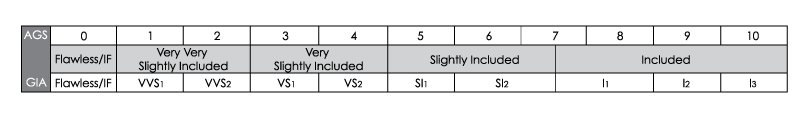

In [41]:
link = soup3.find_all("img")[2]["src"]
base = "https://www.americangemsociety.org"
link1 =[base+link]
link1
type(link1)
Image(link1[0])

This graphical scale below also provides an illustration to show what `inclusions` and `blemishes` mean. They are basically defects in a diamond which de-grade their value - more defects equate to a lower clarity grade.

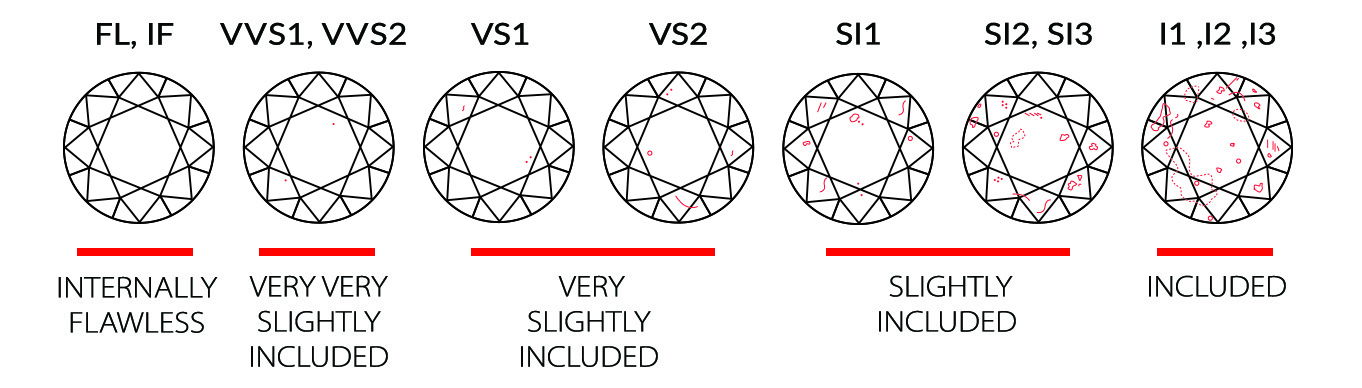

In [42]:
url4="https://yourdiamondguru.com/clarity/"
response = requests.get(url4)
soup4 = bs(response.text)
link = soup4.find_all("img")[5]["src"]
Image(link)

This is also a reference diagram on the various type of inclusions and blemishes commonly found in diamonds.

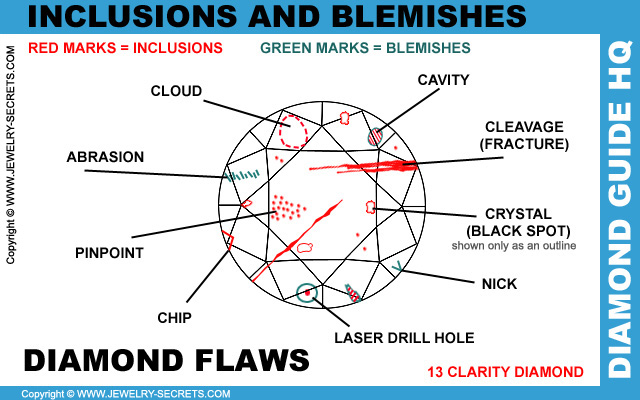

In [43]:
url5 = "https://www.jewelry-secrets.com/Blog/the-worst-diamond-flaw-position/"
response = requests.get(url5)
soup5 = bs(response.text)
link = soup5.find(class_="entry clearfix").find_all("img")[1]["src"]
Image(link)

#### - Dictionaries: 

1) For `Clarity`, our dataset only contains the Gemological Institute of America (GIA) diamond grading system and scale, ie VVS1 etc. These are abbreviations and we want to have a dictionary to showcase the full length description of each grade.

2) There is also an American Gem Society (AGS) grading system which we want to include for reference. The only exception is that AGS 7 can be categorized as SI2 or I1 but we will assume it as I1 in our dictionary. I1 can also be classified as AGS 8.

3) Lastly, we also want to create a dictionary to capture the descriptions found on the website.

In [44]:
clarity_dict_abbrev = {
    "IF": "Internally flawless",
    "VVS1": "Very very slightly included",
    "VVS2": "Very very slightly included",
    "VS1": "Very slightly included",
    "VS2": "Very slightly included",
    "SI1": "Slightly included",
    "SI2": "Slightly included",
    "I1": "Included",
    "I2": "Included",
    "I3": "Included",
}

In [45]:
clarity_dict_AGS = {
    "IF": "AGS0",
    "VVS1": "AGS1",
    "VVS2": "AGS2",
    "VS1": "AGS3",
    "VS2": "AGS4",
    "SI1": "AGS5",
    "SI2": "AGS6",
    "I1": "AGS7/8",
    "I2": "AGS9",
    "I3": "AGS10",
}

In [46]:
IF = soup3.find_all("p")[4].text
VVS = soup3.find_all("p")[6].text
VS = soup3.find_all("p")[8].text
SI = soup3.find_all("p")[10].text
I = soup3.find_all("p")[12].text

In [47]:
clarity_dict_description = {
    "IF": IF,
    "VVS1": VVS,
    "VVS2": VVS,
    "VS1": VS,
    "VS2": VS,
    "SI1": SI,
    "SI2": SI,
    "I1": I,
    "I2": I,
    "I3": I,
}

In [48]:
clarity_fulltext = []
AGS = []
description = []

for i in data["clarity"]:
    x = clarity_dict_abbrev[i]
    y = clarity_dict_AGS[i]
    z = clarity_dict_description[i]
    clarity_fulltext.append(x)
    AGS.append(y)
    description.append(z)

data["clarity_fulltext"] = clarity_fulltext
data["AGS"] = AGS
data["description"] = description

These 3 columns of data have been added to our dataset via referencing the 3 dictionaries we created. This will help us to refer to information correctly for our further analysis.

In [49]:
data.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

      volume        clarity_fulltext   AGS  \
0  38.202030       Slightly included  AGS6   
1  34.505856       Slightly included  AGS5   
2  38.076885  Very slightly included  AGS3   
3  46.724580  Very slightly included  AGS4   
4  51.917250       Slightly included  AGS6   

                                                                                                                                                                                                                 description  
0  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.  
1  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.  
2                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.  
3                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.  
4  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.

In [50]:
data.groupby(["clarity"])["price"].count()

clarity
I1        738
IF       1790
SI1     13063
SI2      9184
VS1      8168
VS2     12254
VVS1     3654
VVS2     5066
Name: price, dtype: int64

A quick visualisation of Clarity of a diamond using catplot

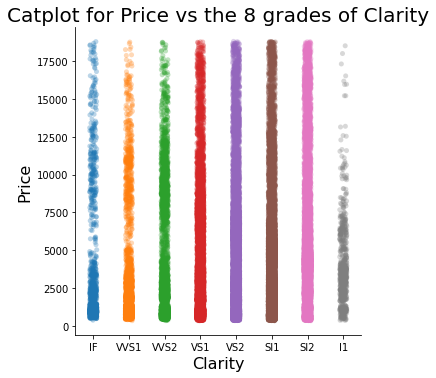

In [51]:
clarity_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]
sns.catplot(x="clarity", y="price", data=data, alpha = 0.3, order = clarity_order)
plt.title("Catplot for Price vs the 8 grades of Clarity", size = 20)
plt.xlabel("Clarity", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

For `Clarity`, we can observe a similar 'thining' pattern with very few high prices for the lowest I1 grade - this is a similar observation as what we observed for `Cut`. 

However, it is very interesting to note that we also observe a similar effect for the 3 highest grades of IF, VVS1 and VVS2. As an initial suggestion, we could possibly say that there might not be a visible difference between these top 3 grades and hence not a huge premium is paid for these grades vs lower grades like VS1 and VS2.

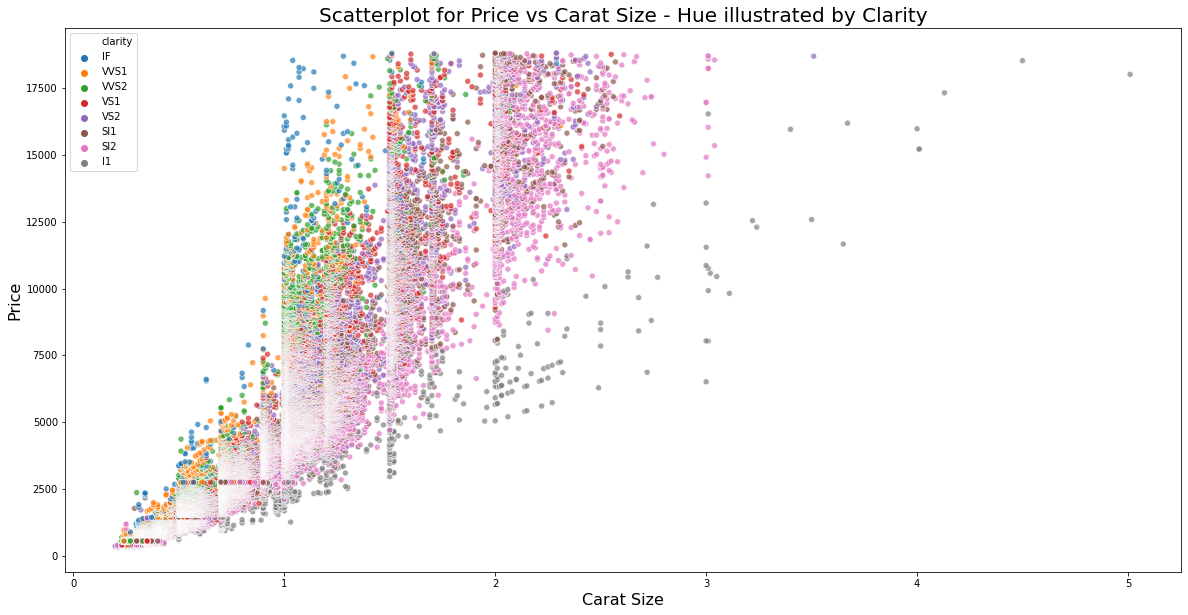

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data['carat'], y=data['price'], alpha = 0.7, hue = data['clarity'], hue_order = clarity_order)
plt.title("Scatterplot for Price vs Carat Size - Hue illustrated by Clarity", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The scatterplot above employs `Hue` to illustrate the different 'Clarity' grading by various GIA grades.

### 5.3) Color

In [53]:
url6 = "https://www.lumeradiamonds.com/diamond-education/diamond-color"
response = requests.get(url6)
response
page6 = response.text
soup6 = bs(page6)
GIA = soup6.find_all("p")[6].text
print(GIA)

The GIA grades diamonds on a scale of D (colorless) through Z (light color). All D-Z diamonds are considered white,
  even though they contain varying degrees of color. True fancy colored diamonds (such as yellows, pinks, and blues)
  are graded on a separate color scale. 


We included a color scale below from D to M grades to provide a visual reference on the observable change in color over the different grades.

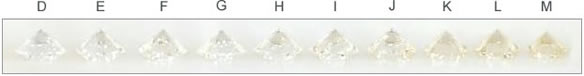

In [54]:
l = soup6.find_all("img")[5]["src"]
Image(l)

Our dataset contains the 7 best grades from D to J. There are also grades from K-Z but our dataset does not have any observations in this range.
- D: Colorless
- E: Colorless
- F: Colorless
- G: Near Colorless
- H: Near Colorless
- I: Near Colorless
- J: Near Colorless

In [55]:
data.groupby(["color"])["price"].count()

color
D     6774
E     9795
F     9538
G    11284
H     8297
I     5421
J     2808
Name: price, dtype: int64

A quick visualisation of Color of a diamond using catplot

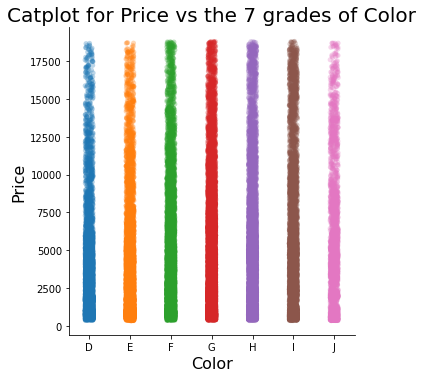

In [56]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
sns.catplot(x="color", y="price", data=data, alpha = 0.3, order = color_order)
plt.title("Catplot for Price vs the 7 grades of Color", size = 20)
plt.xlabel("Color", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

Generally, the catplots for 'Color' are quite uniform - this suggests no significant relationships between the 2 variables. However, we do notice just a very slight thinning effect for the lowest 'J' grade and also the highest 2 'D' & 'E' grades. This suggests a very weak relationship for color vs price.  

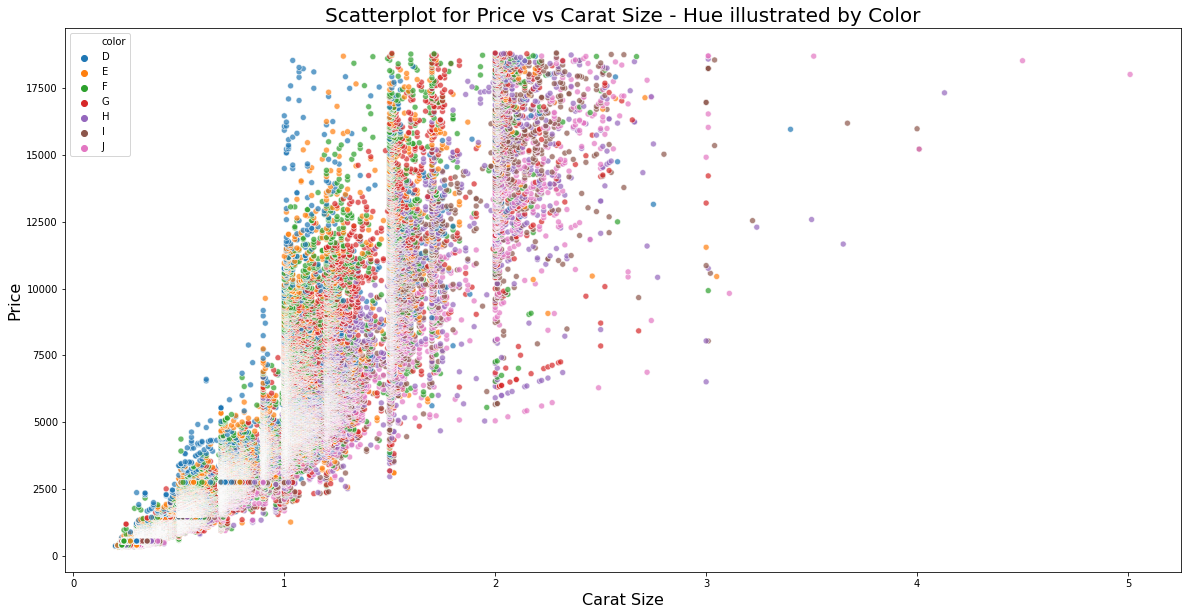

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data['carat'], y=data['price'], alpha = 0.7, hue = data['color'], hue_order = color_order)
plt.title("Scatterplot for Price vs Carat Size - Hue illustrated by Color", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The scatterplot above employs `Hue` to illustrate the different 'Color' grading by using various colors. Please pardon the pun! 

## 6) Observed Price relationships based on carat size

From our initial visual investigation on price relationships with categorical data, we notice that certain size ranges exhibit clearer relationships. We want to split our dataset into different sizes to run further analysis.

From our research, we also understood that different sizes cater to various usage. Broadly speaking, we can say that: 
- Large diamonds above 1.5 carat size are for larger piece jewelry like necklaces.
- Medium diamonds within the 1.0 to 1.5 carat size range are mostly for rings.
- Small diamonds under 1.0 but above 0.25 carat size tend to be used more in earrings settings.
- Splints or diamonds below 0.25 carat sizes are used for side decorations for other accessories.

In [58]:
size = []

In [59]:
for x in data["carat"]:
    if x > 1.5:
        size.append("large")
    elif x > 1.0:
        size.append("medium")
    elif x > 0.25:
        size.append("small")
    else:
        size.append("splints")

In [60]:
data['size'] = size

In [61]:
data.groupby(["size"])["price"].count()

size
large       5434
medium     12051
small      35647
splints      785
Name: price, dtype: int64

In [62]:
data.sample(10)     # Draw a random sample to see if 'size' has been correctly implemented. 

carat        cut color clarity  depth  table  price     x     y     z  \
50145   0.71       Good     G     SI1   63.9   56.0   2215  5.62  5.59  3.58   
29879   0.30  Very Good     D     VS2   62.8   57.0    710  4.29  4.31  2.70   
35769   0.40    Premium     E     VS2   59.3   59.0    912  4.77  4.81  2.84   
5575    1.21       Fair     H     SI1   69.6   55.0   3862  6.49  6.42  4.49   
17360   1.01    Premium     G    VVS2   60.9   59.0   6968  6.59  6.54  4.00   
47587   0.51      Ideal     H    VVS2   61.6   55.0   1877  5.11  5.14  3.16   
19861   1.30      Ideal     G     SI1   61.6   55.0   8416  7.01  7.05  4.33   
20612   1.14  Very Good     F    VVS2   63.3   56.0   8912  6.56  6.71  4.20   
5393    0.30    Premium     D     SI2   62.3   58.0    574  4.32  4.29  2.68   
43036   0.55      Ideal     I     VS2   61.8   55.0   1374  5.28  5.32  3.27   

           volume             clarity_fulltext   AGS  \
50145  112.468564            Slightly included  AGS5   
29879   49.922730       Very slightly included  AGS4   
35769   65.160108       Very slightly included  AGS4   
5575   187.079442            Slightly included  AGS5   
17360  172.394400  Very very slightly included  AGS2   
47587   82.998664  Very very slightly included  AGS2   
19861  213.990765            Slightly included  AGS5   
20612  184.873920  Very very slightly included  AGS2   
5393    49.667904            Slightly included  AGS6   
43036   91.852992       Very slightly included  AGS4   

                                                                                                                                                                                                                     description  \
50145  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
29879                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.   
35769                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.   
5575   Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
17360                                                                      A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.   
47587                                                                      A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.   
19861  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
20612                                                                      A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.   
5393   Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
43036                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.   



Splitting Main Dataset into sub-datasets by size

In [63]:
large = data["size"] == "large"
medium = data["size"] == "medium"
small = data["size"] == "small"
splints = data["size"] == "splints"

In [64]:
large_data = data[large]
medium_data = data[medium]
small_data = data[small]
splints_data = data[splints]

Now that the entire dataset is split into 4 sub-categories based on Carat size, let's take a quick look at them.

In [65]:
large_data.head()

carat      cut color clarity  depth  table  price     x     y     z  \
2024   1.52     Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28   
2025   1.52     Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28   
3926   1.51     Good     G      I1   64.0   59.0   3497  7.29  7.17  4.63   
3955   1.52     Fair     H      I1   64.9   58.0   3504  7.18  7.13  4.65   
4128   1.52  Premium     I      I1   61.2   58.0   3541  7.43  7.35  4.52   

          volume clarity_fulltext     AGS  \
2024  239.134728         Included  AGS7/8   
2025  239.134728         Included  AGS7/8   
3926  242.006859         Included  AGS7/8   
3955  238.049310         Included  AGS7/8   
4128  246.839460         Included  AGS7/8   

                                                                                                                                                                                                                                                    description  \
2024  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
2025  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
3926  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
3955  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
4128  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   

       size  
2024  large  
2025  large  
3926  large  
3955  large  
4128  large

In [66]:
medium_data.head()

carat        cut color clarity  depth  table  price     x     y     z  \
172   1.17  Very Good     J      I1   60.2   61.0   2774  6.83  6.90  4.13   
215   1.01    Premium     F      I1   61.8   60.0   2781  6.39  6.36  3.94   
241   1.01       Fair     E      I1   64.5   58.0   2788  6.29  6.21  4.03   
242   1.01    Premium     H     SI2   62.7   59.0   2788  6.31  6.22  3.93   
247   1.05  Very Good     J     SI2   63.2   56.0   2789  6.49  6.45  4.09   

         volume   clarity_fulltext     AGS  \
172  194.634510           Included  AGS7/8   
215  160.123176           Included  AGS7/8   
241  157.415427           Included  AGS7/8   
242  154.245426  Slightly included    AGS6   
247  171.209445  Slightly included    AGS6   

                                                                                                                                                                                                                                                   description  \
172  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
215  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
241  Included diamonds with a clarity grade of 7, 8, 9, or 10 (I1, I2, or I3), have inclusions that are obvious at 10x magnification.  Sometimes, they can be seen with the naked eye. At the lower clarities, may have an effect on the diamond’s durability.   
242                                  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
247                                  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   

       size  
172  medium  
215  medium  
241  medium  
242  medium  
247  medium

In [67]:
small_data.head()

carat        cut color clarity  depth  table  price     x     y     z  \
3    0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4    0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
7    0.26  Very Good     H     SI1   61.9   55.0    337  4.07  4.11  2.53   
10   0.30       Good     J     SI1   64.0   55.0    339  4.25  4.28  2.73   
13   0.31      Ideal     J     SI2   62.2   54.0    344  4.35  4.37  2.71   

       volume        clarity_fulltext   AGS  \
3   46.724580  Very slightly included  AGS4   
4   51.917250       Slightly included  AGS6   
7   42.321081       Slightly included  AGS5   
10  49.658700       Slightly included  AGS5   
13  51.515745       Slightly included  AGS6   

                                                                                                                                                                                                                  description  \
3                                                                                                                          Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.   
4   Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
7   Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
10  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
13  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   

     size  
3   small  
4   small  
7   small  
10  small  
13  small

In [68]:
splints_data.head()

carat        cut color clarity  depth  table  price     x     y     z  \
0   0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48   
6   0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98  2.47   

      volume             clarity_fulltext   AGS  \
0  38.202030            Slightly included  AGS6   
1  34.505856            Slightly included  AGS5   
2  38.076885       Very slightly included  AGS3   
5  38.693952  Very very slightly included  AGS2   
6  38.830870  Very very slightly included  AGS1   

                                                                                                                                                                                                                 description  \
0  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
1  Slightly Included diamonds with a clarity grade of 5, 6, or 7 (SI1 or SI2) have noticeable inclusions that are fairly easy to see under 10x magnification. Sometimes, these inclusions can be visible to the unaided eye.   
2                                                                                                                         Very Slightly Included diamonds with a clarity grade of 3 or 4 (VS1 or VS2) have minor inclusions.   
5                                                                      A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.   
6                                                                      A diamond with a clarity grade of 1 or 2 (VVS1 or VVS2) has minute inclusions that are difficult for a skilled grader to see under 10x magnification.   

      size  
0  splints  
1  splints  
2  splints  
5  splints  
6  splints

## `Large` size dataset

It seems that `cut` is still relatively important for prices of large diamonds. However, we can see that `clarity` and `color` do not matter as much with many diamonds of lower grades still commanding high prices.

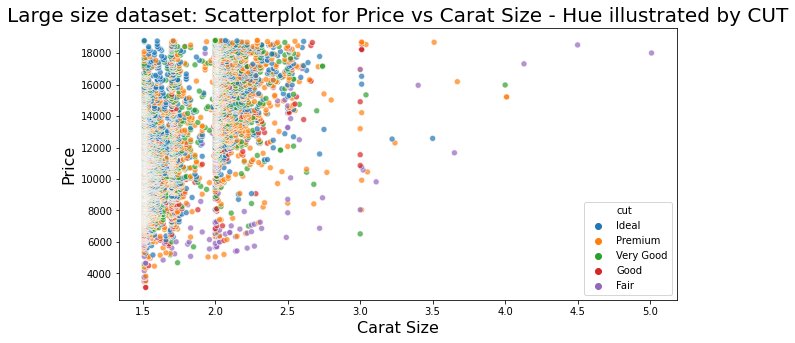

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = large_data['carat'], y=large_data['price'], alpha = 0.7, hue = data['cut'], hue_order = cut_order )
plt.title("Large size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CUT", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

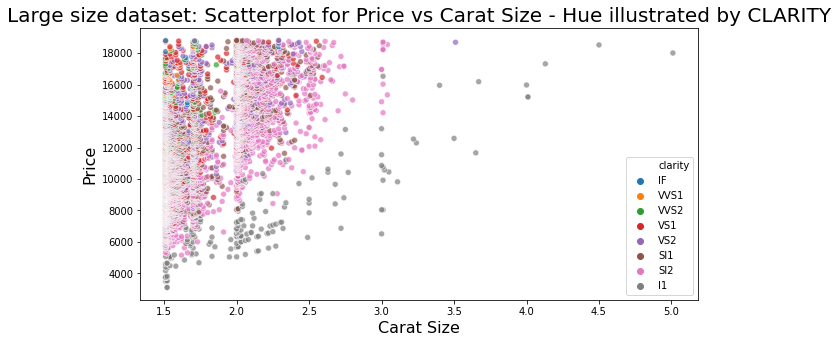

In [70]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = large_data['carat'], y=large_data['price'], alpha = 0.7, hue = data['clarity'], hue_order = clarity_order )
plt.title("Large size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CLARITY", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

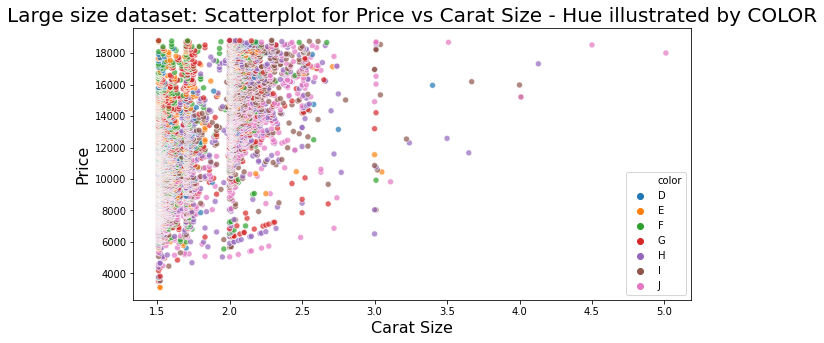

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = large_data['carat'], y=large_data['price'], alpha = 0.7, hue = data['color'], hue_order = color_order )
plt.title("Large size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by COLOR", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

## `Medium` size dataset

There is a much more obvious relationship in the medium size dataset. For all categories in `cut`, `clarity` and `color`, we can see that higher prices correspond well with the top grades in each category.

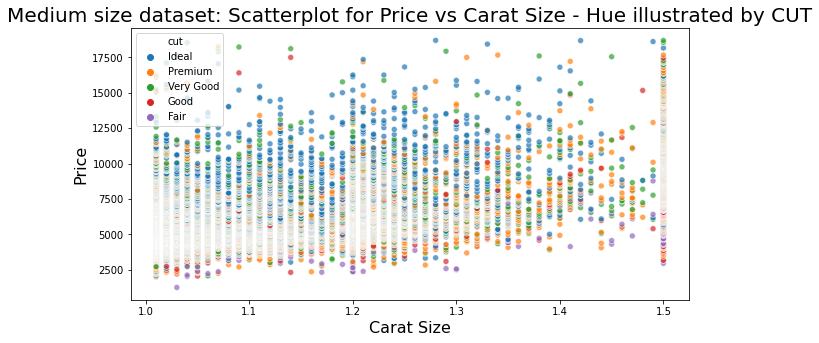

In [72]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = medium_data['carat'], y=medium_data['price'], alpha = 0.7, hue = data['cut'], hue_order = cut_order )
plt.title("Medium size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CUT", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

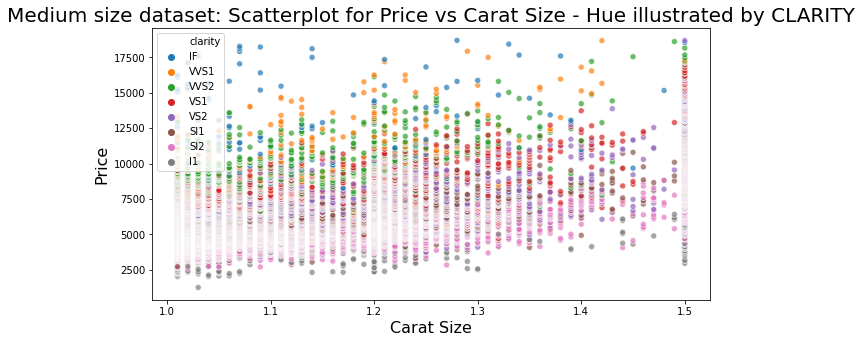

In [73]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = medium_data['carat'], y=medium_data['price'], alpha = 0.7, hue = data['clarity'], hue_order = clarity_order )
plt.title("Medium size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CLARITY", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

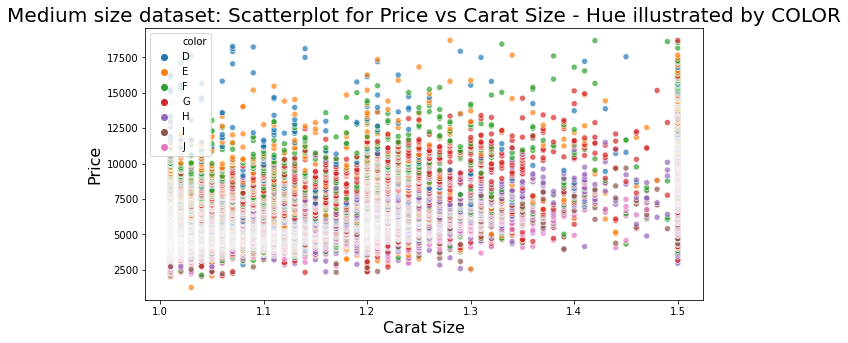

In [74]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = medium_data['carat'], y=medium_data['price'], alpha = 0.7, hue = data['color'], hue_order = color_order )
plt.title("Medium size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by COLOR", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

## `Small` size dataset

`Cut` seems to be an important factor for the small size dataset. There is also a positive relationship for `clarity` and `color` with price but it is less visible.

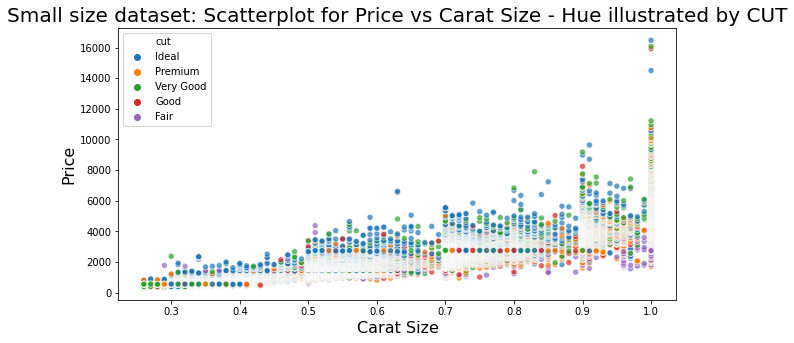

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = small_data['carat'], y=small_data['price'], alpha = 0.7, hue = data['cut'], hue_order = cut_order )
plt.title("Small size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CUT", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

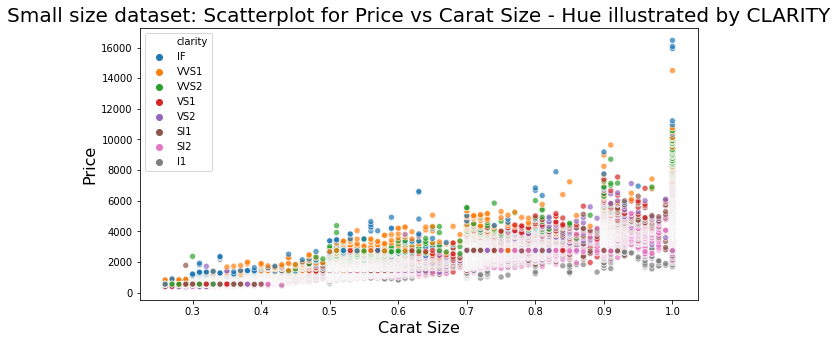

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = small_data['carat'], y=small_data['price'], alpha = 0.7, hue = data['clarity'], hue_order = clarity_order )
plt.title("Small size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CLARITY", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

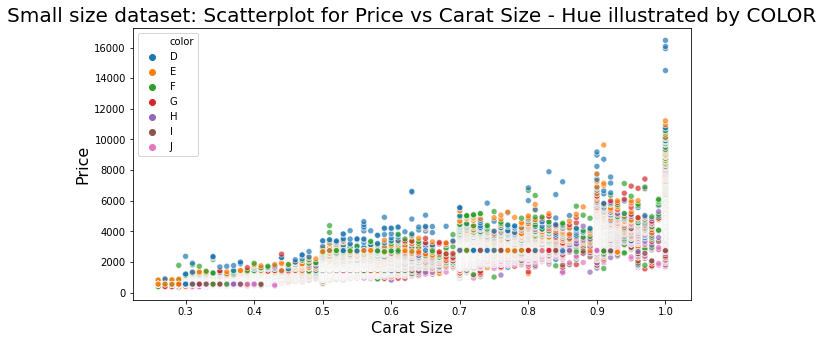

In [77]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = small_data['carat'], y=small_data['price'], alpha = 0.7, hue = data['color'], hue_order = color_order )
plt.title("Small size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by COLOR", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

## `Splints` size dataset

No clear relationship for any of the categories. This is also the smallest dataset with only 785 observations.

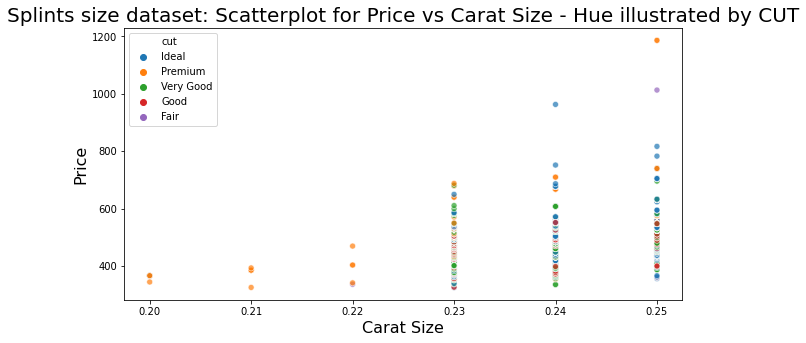

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = splints_data['carat'], y=splints_data['price'], alpha = 0.7, hue = data['cut'], hue_order = cut_order )
plt.title("Splints size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CUT", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

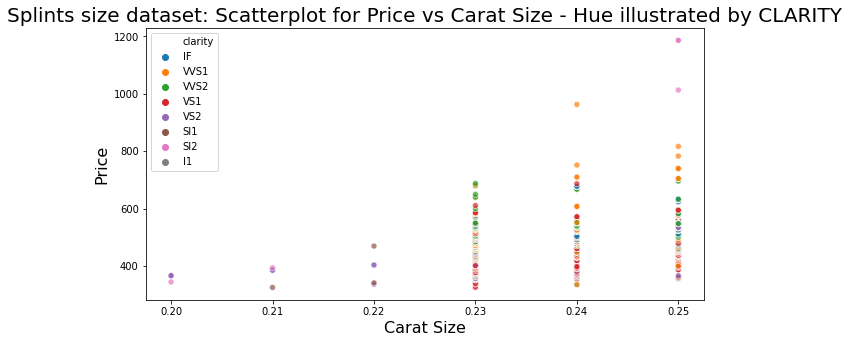

In [79]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = splints_data['carat'], y=splints_data['price'], alpha = 0.7, hue = data['clarity'], hue_order = clarity_order )
plt.title("Splints size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by CLARITY", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

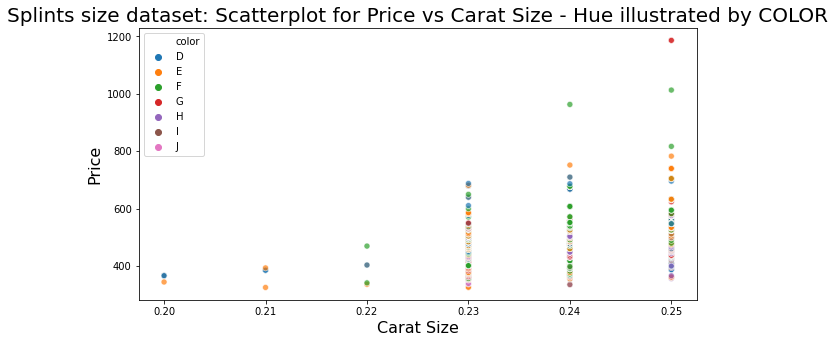

In [80]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = splints_data['carat'], y=splints_data['price'], alpha = 0.7, hue = data['color'], hue_order = color_order )
plt.title("Splints size dataset: Scatterplot for Price vs Carat Size - Hue illustrated by COLOR", size = 20)
plt.xlabel("Carat Size", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

## 7) Numerical Data

### Part 1: Length, Width & Depth
    
- x: length mm 
- y: width mm 
- z: depth mm 

We can create a new column to the dataset called "Length to Width Ratio" where a perfect `circle` would be 1.0 and anything else would be considered an `oval`. 

`The formula would be x / y.`

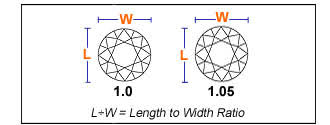

In [81]:
Image("Length to Width Ratio.jpg", width = 400, height = 400)   # Top view of a diamond

In [82]:
data["xy_ratio"] = data["x"] / data["y"]

data["xy_ratio"].describe()

count    53917.000000
mean         0.999457
std          0.010455
min          0.749169
25%          0.992625
50%          0.995745
75%          1.006944
max          1.615572
Name: xy_ratio, dtype: float64

Plotting a histogram of the dataset xy_ratio:
- We can see a bi-modal distribution exists for the xy_ratio (or how perfectly round a diamond is). 
- There are very few diamonds with a perfect 1.0 ratio.
- However, the variance is not huge with the modes around 0.995 and 1.005. This is less than 1% difference and might not even be visible to the human eye.

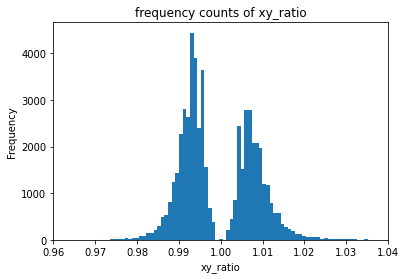

In [83]:
data.xy_ratio.plot(kind = "hist", bins = 1000)
plt.xlim([0.96,1.04])
plt.xlabel("xy_ratio")
plt.title("frequency counts of xy_ratio")
plt.show()

The `depth` of a diamond refers to its measurement from top to bottom, from the table on the top of the diamond to the culet at its base.

In [84]:
url7 = "https://www.diamonds.pro/guides/diamond-proportion/"
response = requests.get(url7)
response
page7 = response.text
soup7 = bs(page7)
print(soup7.find_all("p")[15].text)

If a diamond is cut too shallow or too deep, light is lost out the sides and doesn’t reflect as well back to the eye. In other words, if a diamond’s proportions are poor, the diamond looks dull and lifeless. 


In [85]:
cross_dimension = soup7.find_all( class_ ="wp-block-image")[0]
link = cross_dimension.next["data-src"]
Image(url=link)

### Part 2: Depth % and Table %

- Depth: depth %: The height of a diamond, measured from the culet to the table, divided by its average diameter (width). `( The forumla is z / y )`


- Table: table%: The width of the diamond's table expressed as a percentage of its average diameter (width).



In [86]:
print(soup7.find_all("p")[13].text), 
print(soup7.find_all("p")[15].text)

Diamond proportion is the ratio and size of the diamond’s depth, width and table. The exact proportions like table and depth percentage play a huge role in the beauty of a diamond. Diamond proportion is an element of Diamond Cut and is critical to a stone’s brilliance and value. 
If a diamond is cut too shallow or too deep, light is lost out the sides and doesn’t reflect as well back to the eye. In other words, if a diamond’s proportions are poor, the diamond looks dull and lifeless. 


In [87]:
refractivity = soup7.find_all( class_ ="wp-block-image")[1]
link1 = refractivity.next["data-src"]
Image(url=link1)

### Depth Percentage %

In [88]:
print(soup7.find_all("p")[20].text, "\n", soup7.find_all("li")[144].text,"\n", soup7.find_all("li")[145].text)

Depth percentage is calculated by dividing the depth of the diamond (its height) by its width. For example, if a diamond measures 3mm in depth and 4mm in width, the depth percentage is 75%.  
 A diamond with a lower depth percentage usually appears larger due to its increased width, but often creates a dark appearance as the diamond doesn’t reflect light as well. 
 A diamond with too high of a depth percentage loses light out the bottom of the diamond, making it appear dull.


In [89]:
data["depth"].describe()

count    53917.000000
mean        61.749565
std          1.432318
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

### Table Percentage %

In [90]:
print(soup7.find_all("p")[18].text,"\n",soup7.find_all("li")[140].text,"\n",soup7.find_all("li")[141].text)

Table percentage is calculated by dividing the table width (top surface area) by the diameter. For example, if the table facet is 3mm wide and the diameter is 5mm, the table percentage is 60%.  
 If the table percentage is too low, light gets trapped inside the diamond and leaks out the sides of the diamond (instead of reflecting back through the table).  
 If the table percentage is too high, light doesn’t reflect off of the diamond’s crown angles and facets—leaving the diamond looking dull. 


In [91]:
data["table"].describe()

count    53917.000000
mean        57.456939
std          2.234069
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

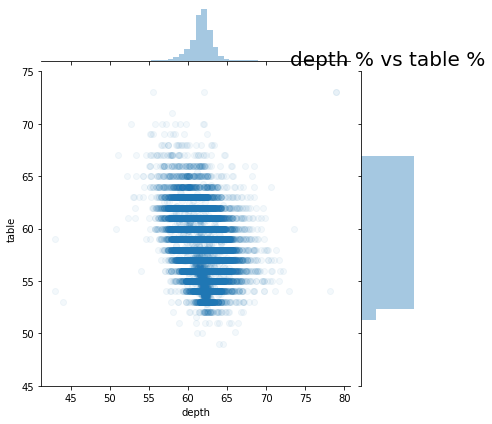

In [92]:
sns.jointplot(x=data["depth"], y=data["table"], kind='scatter', alpha = 0.05)    
plt.xlim(50, 75)
plt.ylim(45, 75)
plt.title("depth % vs table %", size = 20)
plt.show()

A huge concentration of the table and depth variables are in the region of 
- 50 to 65 for table %
- 55 to 70 for depth %

More information about table & depth
https://www.diamondscreener.com/education/recommended-depth-table-and-length-width-ratio-for-fancy-shape-diamonds/

#### Depth % vs Price - Analysis by size.
We graphed a scatterplot of `depth` vs `price` and used hue to illustrate `size` by using different colours.

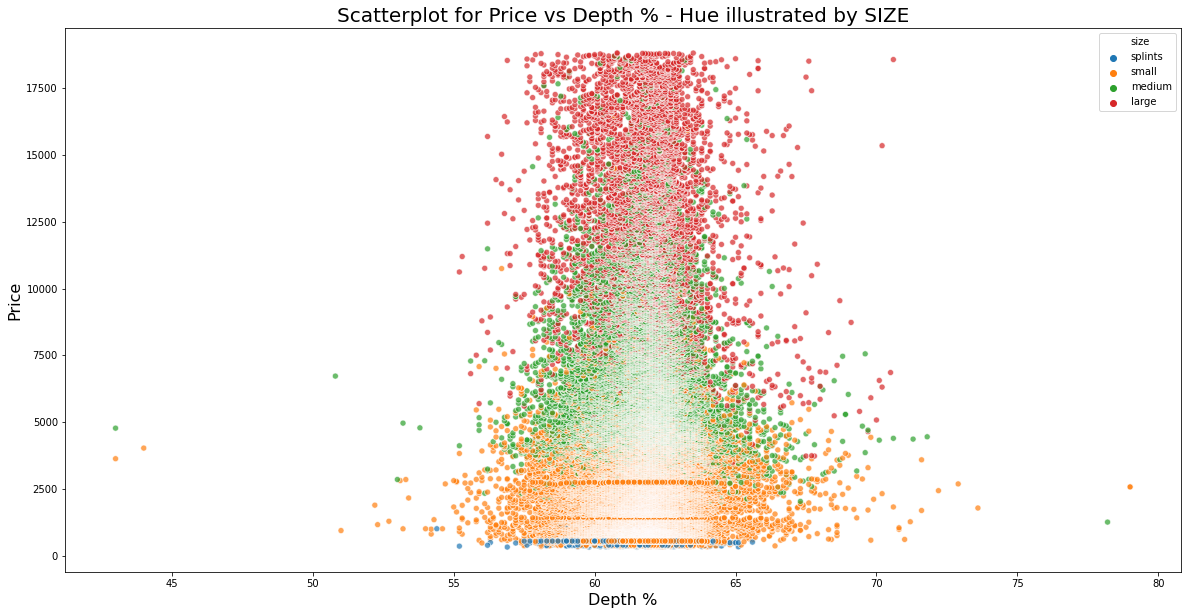

In [93]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data['depth'], y=data['price'], alpha = 0.7, hue =data['size'])
plt.title("Scatterplot for Price vs Depth % - Hue illustrated by SIZE", size = 20)
plt.xlabel("Depth %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

These are the variances for the different sub-datasets on sizes. Let's also take a closer look by viewing each sub-dataset individually. 

In [94]:
np.var(large_data['depth']), np.var(medium_data['depth']), np.var(small_data['depth']), np.var(splints_data['depth'])

(2.656172317889983, 2.1835100251365565, 1.9143622792436412, 2.0017887946772666)

In the `large` diamonds sub-dataset, we can visually see that the datapoints are quite widely spread out. Not surprisingly, the variance is also the widest out of the 4 sub-datasets at 2.65.

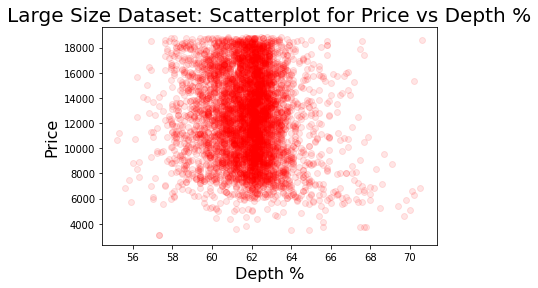

In [95]:
plt.scatter(x = large_data['depth'], y=large_data['price'], alpha = 0.1, color = 'red')
plt.title("Large Size Dataset: Scatterplot for Price vs Depth %", size = 20)
plt.xlabel("Depth %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `medium` sub-dataset has a much tighter grouping with a variance of 2.18. Visually, we can also see that there is a tighter grouping as we get into the higher price regions.

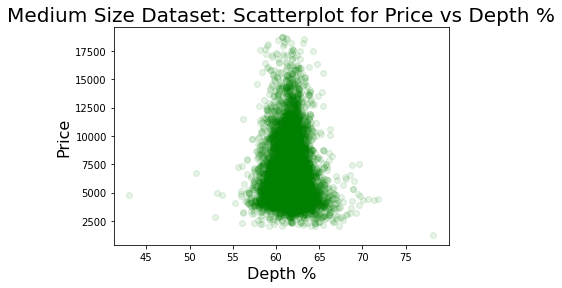

In [96]:
plt.scatter(x = medium_data['depth'], y=medium_data['price'], alpha = 0.1, color = 'green')
plt.title("Medium Size Dataset: Scatterplot for Price vs Depth %", size = 20)
plt.xlabel("Depth %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `small` size sub-dataset has the tightest grouping out of all the sizes with a variance of 1.91. There is a tighter grouping as we get into the higher price regions but the shape is less pronounced that the medium sub-dataset.

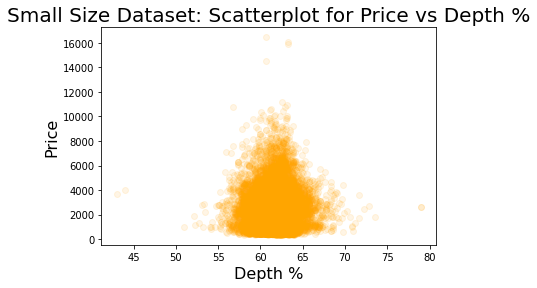

In [97]:
plt.scatter(x = small_data['depth'], y=small_data['price'], alpha = 0.1, color = 'orange')
plt.title("Small Size Dataset: Scatterplot for Price vs Depth %", size = 20)
plt.xlabel("Depth %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `splints` sub-dataset shows a variation of 2.00 with no clear relationship visually.

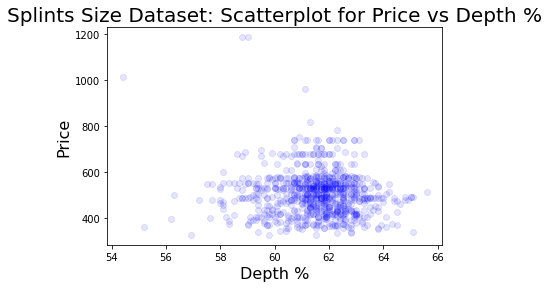

In [98]:
plt.scatter(x = splints_data['depth'], y=splints_data['price'], alpha = 0.1, color = 'blue')
plt.title("Splints Size Dataset: Scatterplot for Price vs Depth %", size = 20)
plt.xlabel("Depth %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

#### Table % vs Price - Analysis by size.
We graphed a scatterplot of `Table` vs `price` and used hue to illustrate `size` by using different colours. Table % seems fairly uniform across all the sub-datasets.

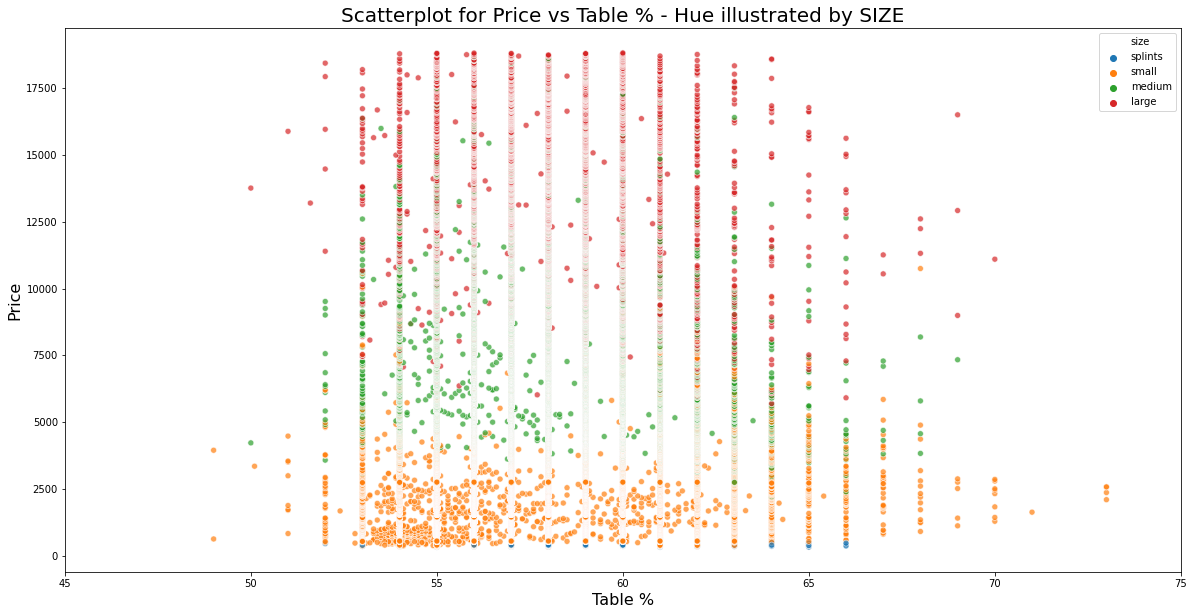

In [99]:
plt.figure(figsize=(20,10))
sns.scatterplot(x = data['table'], y=data['price'], alpha = 0.7, hue =data['size'])
plt.xlim(45,75)
plt.title("Scatterplot for Price vs Table % - Hue illustrated by SIZE", size = 20)
plt.xlabel("Table %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

These are the variances for the different sub-datasets on sizes. Let's also take a closer look by viewing each sub-dataset individually.

In [100]:
np.var(large_data['table']), np.var(medium_data['table']), np.var(small_data['table']), np.var(splints_data['table'])

(5.035565358599617, 4.35229417302109, 5.057568450376505, 5.456880197979628)

The `large` sub-dataset shows relatively high variance of 5.04 but visually looks uniformly spread except for some outliers in the 65-70 table % range.

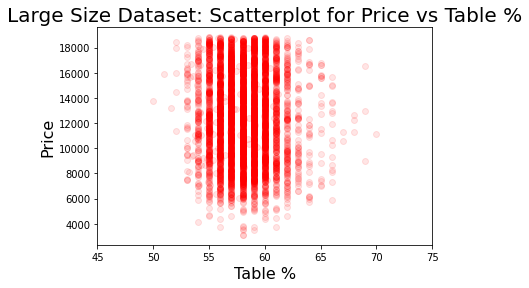

In [101]:
plt.scatter(x = large_data['table'], y=large_data['price'], alpha = 0.1, color = 'red')
plt.xlim(45,75)
plt.title("Large Size Dataset: Scatterplot for Price vs Table %", size = 20)
plt.xlabel("Table %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `medium` sub-dataset shows a lowest variance of 4.35. Visually, we can also see that datapoints in the higher price region show an even lower variance with the lower price region displaying a wider spread of datapoints.

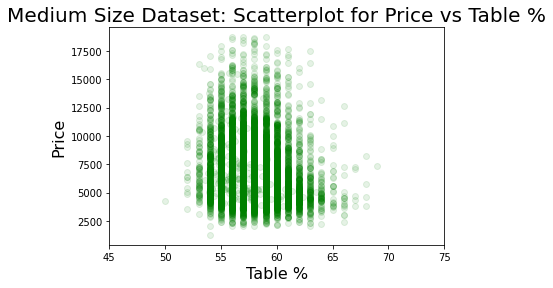

In [102]:
plt.scatter(x = medium_data['table'], y=medium_data['price'], alpha = 0.1, color = 'green')
plt.xlim(45,75)
plt.title("Medium Size Dataset: Scatterplot for Price vs Table %", size = 20)
plt.xlabel("Table %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `small` sub-dataset shows a high variance of 5.06. Visually, we can see that the lower price region displays a wider spread of datapoints and accounts for most of this variance.

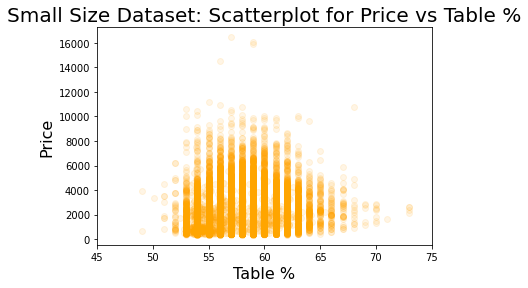

In [103]:
plt.scatter(x = small_data['table'], y=small_data['price'], alpha = 0.1, color = 'orange')
plt.xlim(45,75)
plt.title("Small Size Dataset: Scatterplot for Price vs Table %", size = 20)
plt.xlabel("Table %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

The `splint` sub-dataset shows the highest variance of 5.46. 

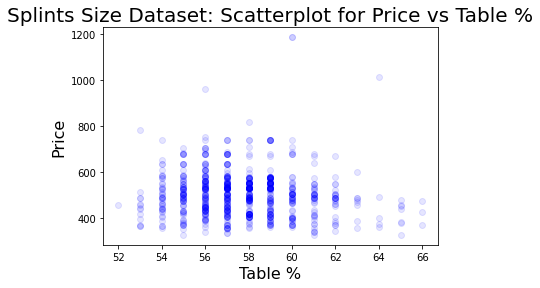

In [104]:
plt.scatter(x = splints_data['table'], y=splints_data['price'], alpha = 0.1, color = 'blue')
plt.title("Splints Size Dataset: Scatterplot for Price vs Table %", size = 20)
plt.xlabel("Table %", size = 16)
plt.ylabel("Price", size = 16)
plt.show()

## 8) Conclusions

We initially observed general relationships for the various parameters with regard to price. Splitting the dataset into sub-datasets based on size allowed us to have a clearer view of these relationships.

- `LARGE` data-set (above 1.5 carats)
    - Cut is still important for prices of large diamonds. 
    - However, clarity and color do not matter as much with many diamonds of lower grades still commanding high prices
    - Depth % (depth as a ratio over width) has datapoints which are quite widely spread out. Not surprisingly, the variance for depth % is also the widest out of the 4 sub-datasets at 2.65.
    - Table % (table length as a ratio over width) showed a fairly high variance of 5.04.

- `MEDIUM` data-set (from 1.0 to 1.5 carats)
    - For all categories in cut, clarity and color, higher prices correspond extremely well with the top grades in each category.
    - For depth %, there is a tight grouping with a low variance of 2.18. We also saw that grouping gets tighter (lower variance) as we get into the higher price regions.
    - The lowest variance for table % at 4.35. Visually, datapoints in the higher price region show an even lower variance - conversely, the lower price region displays a wider spread of datapoints.

- `SMALL` data-set (from 0.25 to 1.0 carats)
    - Cut seems to be an important factor for the small size dataset. 
    - There is a positive relationship for clarity and color with price but it is less visible than in the medium dataset.
    - Depth % showed a very tight grouping with a variance of 1.91. There is a tighter grouping as we get into the higher price regions but the shape is less pronounced that the medium sub-dataset.
    - Table % recorded a high variance of 5.06. From the graphs, the lower price region displays a wider spread of datapoints and accounts for most of this variance.

- `SPLINT` data-set (below 0.25 carats)
    - No clear relationship for any of the categories for cut, color and clarity.
    - Depth % showed a variance of 2.00 with no clear relationship visually.
    - Table % showed the highest variance of 5.46. 

Why do different parameters matter more for different sizes of diamonds? That really depends on their usage in various jewellery and this following information from an online resource helps to put things into perspective.

In [105]:
url8 ="https://www.diamondrocks.co.uk/magazine/how-does-carat-weight-affect-the-price/"
response = requests.get(url8)
soup8 = bs(response.text)
a = soup8.find("body").find("article").find_all("p")[3]
b = soup8.find("body").find("article").find_all("p")[4]
a = str(a.text)
print(a.split("price.")[1])
print(b.text)

 The larger the carat size, the more dramatically the price can increase. This is because it is more difficult to find larger diamonds than it is smaller ones, and so the larger ones are worth considerably more. This is why you might be able to buy two smaller diamonds for less than you might purchase one diamond that weighed the equivalent of both the smaller ones.
Popularity also affects price. Certain carat weights are more popular than others, such as the 1 and 1.25 carat diamonds. Because the diamond market reacts very strongly to supply and demand, these diamonds are not always in ready supply. Their value increases sometimes dramatically compared to other carat weights.


- `LARGE` data-set (above 1.5 carats)
> - Carat size is the most important factor because it is more difficult to find larger diamonds than it is smaller ones, and so the larger ones are worth considerably more. 

- `MEDIUM` data-set (from 1.0 to 1.5 carats)
> -  More emphasis placed on all factors since this range of carat size are more popular than others, such as the 1 and 1.25 carat diamonds. 
> - Because the diamond market reacts very strongly to supply and demand, these diamonds are not always in ready supply. Their value increases sometimes dramatically compared to other carat weights.

- `SMALL` data-set (from 0.25 to 1.0 carats)
> - Transition category, closer to 1.0 are more for engagement ring whilst smaller diamonds are used for earrings/other uses.

- `SPLINT` data-set (below 0.25 carats)
> - Very small size so less emphasis on specifications.

Before we conclude our research, we wanted to dig a little deeper into `Cut` which showed a strong positive relationship with price for all the size categories for `Large, Medium & Small` diamonds. This following resource gave us some interesting points to think about.

In [106]:
url9 = "https://www.lumeradiamonds.com/diamond-education/diamond-cut"
response = requests.get(url9)
soup9 = bs(response.text)
a = soup9.find(class_="app-container").find(class_="left-menu-and-content-container").find_all("p")[1]
link = soup9.find(class_="app-container").find(class_="left-menu-and-content-container").find_all("img")[0]["src"]
b = soup9.find(class_="app-container").find(class_="left-menu-and-content-container").find_all("p")[2:5]
print(a.text)

When a diamond is fashioned from a rough stone, the cutter must balance optimal cut (and therefore appearance) against
  maximum yield (cutting the diamond to maintain as much
  carat weight from the rough stone as possible). Because many customers are willing to pay more for a larger,
  fair-cut cut diamond than for a slightly smaller, well-cut diamond, there is pressure on the cutter to sacrifice
  appearance for weight. This is why the Cut grade is so important; it allows the purchaser to identify those stones
  that were cut Fair to Poor in an effort to gain carat weight.


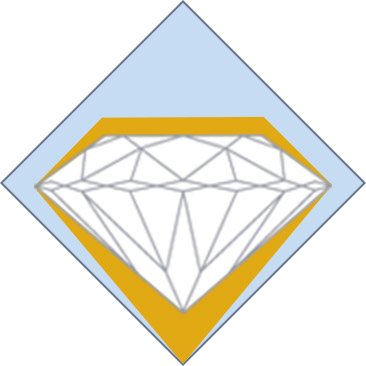

In [107]:
Image(link)

In [108]:
for i in b :
    print(i.text)

At left, the same rough stone (shown in blue) can yield one of two potential diamonds:

A too-deep cut diamond (orange) would yield a significantly larger diamond, earning the diamond cutter a larger profit
  on his investment.


A smaller, well cut diamond (white) may sell for less in total than the larger diamond, but it will command a higher
  price-per-carat not only because of its superior appearance, but also due to decreased yield from the rough stone
  (which therefore makes the diamond more expensive to create).



- Hence, it is good to know that apart from carat size - the most important factor is indeed `Cut`. This is also heartening to know since we are able to control the cut of a diamond by specifying the dimensions during the creation process. The other factors like color and clarity are intrinsic in a rough diamond which we can have no control over.

- We found various jewellery designers promoting dimensions based on "super ideal cuts" which further cements our findings of cut being a key factor.

- Our last piece of research to share is the following which provides more insights into the elements for cut.

In [109]:
url10 = "https://www.diamonds.pro/education/cuts/#:~:text=GIA%20diamond%20cutting%20grades%20for,diamonds%20with%20an%20Excellent%20cut."
response = requests.get(url10)
response
soup10 = bs(response.text)
cut_quality = soup10.find_all( style="font-weight: 400;")[2]
factors = cut_quality.next.next.next.next.find_all("li")

In [110]:
print(cut_quality.text)
print(cut_quality.next.next.text)
for i in range(0,6):
    print(factors[i].text)

The most important factor in a diamond’s value and price is its Cut quality. Many elements are involved in Cut quality including its proportions, facets, finishing details and ability to reflect light. The better these characterstics are as a whole, the higher the quality of the diamond, and in return, the higher the price. While Color and Clarity play a role in a diamond’s beauty, Cut is the most critical of the 4Cs.
Here are the main factors that affect the price of a diamond:
Proportions (table, width, depth)
Symmetrical facets (the mirrors, windows and steps of a diamond)
Brilliance (brightness of white light reflection)
Fire (dispersion of colored light)
Scintillation (the flashes of sparkle when light moves)
Finishing details (permanent treatment and polishing)


- Most of the stated elements contributing to cut are not provided in our dataset, otherwise we would have loved to investiage further 
- we leave the listed points for your further reading in case you were thinking of buying a diamond anytime soon!

### We will conclude our project here and hope that we have piqued your interest on the fascinating world of diamonds and how their size influences what set of factors to be more relevant on prices. 

### Thank you for your kind attention!



## 9) Machine Learning (Not Assessed)


Machine Learning Methods: What else besides Linear Regression?

Found from online research:
- Lasso Regression
- Adaptive Boost Regression
- Gradient Boost Regression
- Random Forest Regression
- Ridge Regression
>

Others listed in:https://jakevdp.github.io/PythonDataScienceHandbook/
- Naive Bayes Classification
- Support Vector Machines
- Principal Component Analysis
- Manifold Learning
- k-Means Clustering
- Gaussian Mixture Models
- Kernel Density Estimation

In [111]:
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV , KFold , cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor 

In [112]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'volume', 'clarity_fulltext', 'AGS', 'description', 'size',
       'xy_ratio'],
      dtype='object')

In [113]:
numerical_data = data[['carat', 'depth', 'table','x','y','z','xy_ratio']]
price = data['price']

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numerical_data, price, test_size = 0.5)   

In [115]:
# Collect all R2 Scores.
R2_Scores = []
models = ['Linear Regression' , 'Lasso Regression' , 'AdaBoost Regression' , 'Ridge Regression' , 'GradientBoosting Regression',
          'RandomForest Regression' , 'KNeighbours Regression']

Now R2 (or R squared) is called the coefficient of determination of the regression model.
R2 measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s).
https://en.wikipedia.org/wiki/Coefficient_of_determination

The best possible score for R2 is 1.0 when the model predicts perfectly the actual result.
A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.
R2 can be negative if the model is arbitrarily worse than the actual result.

### 9.1) Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [116]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
y_pred = clf_lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared for Linear Regression", r2)

R-squared for Linear Regression 0.8595169987429702


### 9.2) Lasso Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [117]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train) 
y_pred = model_lasso.predict(X_test)
r2 = r2_score(y_test, y_pred) 
R2_Scores.append(r2)
print("R-squared for Lasso Regression", r2)

R-squared for Lasso Regression 0.8572202236671289


### 9.3) Adaptive Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [118]:
ada = AdaBoostRegressor(n_estimators=1000)
ada.fit(X_train , y_train)
y_pred = ada.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared for Adaptive Boosting", r2)

R-squared for Adaptive Boosting 0.8260996744004092


### 9.4) Ridge Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [119]:
rr = Ridge(normalize=True)
rr.fit(X_train , y_train)
y_pred = rr.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared", r2)

R-squared 0.7810061211247529


### 9.5) Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [120]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)
gbr.fit(X_train , y_train)
y_pred = gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared for Gradient Boosting", r2)

      Iter       Train Loss   Remaining Time 
         1    14092647.2127            0.79s
         2    12487660.4718            0.64s
         3    11166027.1459            0.61s
         4    10020114.3232            0.58s
         5     8992922.8546            0.53s
         6     8140322.2900            0.53s
         7     7380078.5502            0.50s
         8     6747604.0437            0.49s
         9     6182399.3766            0.50s
        10     5712085.9928            0.48s
        20     3158948.6416            0.38s
        30     2339220.7690            0.35s
        40     2053072.9108            0.32s
        50     1949759.2532            0.26s
        60     1910547.5750            0.20s
        70     1891110.2047            0.14s
        80     1877307.3446            0.09s
        90     1866995.0008            0.05s
       100     1858938.0958            0.00s
R-squared for Gradient Boosting 0.8788331344460242


### 9.6) Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [121]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train , y_train)
y_pred = rf.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared for Random Forest Regression", r2)

R-squared for Random Forest Regression 0.8774333720138828


### 9.7) K Nearest Neighbors Regression

https://scikit-learn.org/stable/modules/neighbors.html

In [122]:
knn = KNeighborsRegressor()
knn.fit(X_train , y_train)
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
R2_Scores.append(r2)
print("R-squared for K Nearest Neighbors Regression", r2)

R-squared for K Nearest Neighbors Regression 0.8634014833201711


### How do we compare different Machine Learning Methods?


In [123]:
compare = pd.DataFrame({'Algorithms' : models , 'R2-Scores' : R2_Scores})
compare.sort_values(by='R2-Scores' ,ascending=False)

Algorithms  R2-Scores
4  GradientBoosting Regression   0.878833
5      RandomForest Regression   0.877433
6       KNeighbours Regression   0.863401
0            Linear Regression   0.859517
1             Lasso Regression   0.857220
2          AdaBoost Regression   0.826100
3             Ridge Regression   0.781006

Text(0.5, 1.0, 'R2-Scores for the various machine learning techniques')

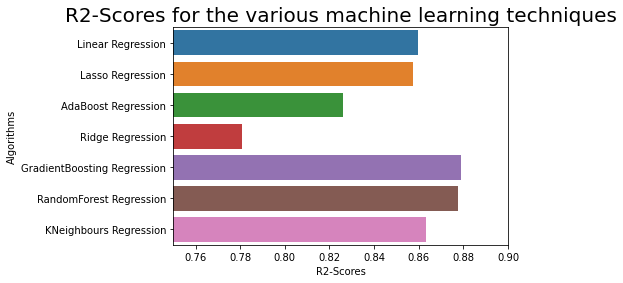

In [124]:
sns.barplot(x='R2-Scores' , y='Algorithms' , data=compare)
plt.xlim(0.75,0.9)
plt.title("R2-Scores for the various machine learning techniques", size = 20)

#### Results for Machine Learning:
- It appears that Gradient Boosting & Random Forest regression work best for this numerical dataset with R2 scores almost at 88%.
- Linear, Lasso & K Nearest Neighbors regression are also decent models closer to 86% on the R2 scores.
- Adaboost regression featured at 83% R2 value whilst Ridge regression fared the poorest out of the selected methods at 77.5% R2 score.

## 10) References

 Shivamagrawal . (2017) .Diamonds-Analyze diamonds by their cut, color, clarity, price, and other attributes. 
 > https://www.kaggle.com/shivam2503/diamonds

 The fourth – and most important – of the Four Cs: Cut (2016) . GIA Certified Loose Diamonds for Sale at Guaranteed Lowest Prices. 
 > https://www.loosediamondsreviews.com/

 American Gem Society (AGS).(2005) Diamond Clarity Scale.
 > https://www.americangemsociety.org/page/clarityscale

 Lumera.(2015) .Diamond Color Chart. 
 > https://www.lumeradiamonds.com/diamond-education/diamond-color

 Michael Fried.(2020, June 29). Diamond Proportion . 
 > https://www.diamonds.pro/guides/diamond-proportion/

 Diamond Screener.(2020). Recommended Depth, Table, and Length/Width Ratio for Fancy Shape Diamonds. 
 > https://www.diamondscreener.com/terms-of-service/

 Jake VanderPlas .(2016). Python Data Science Handbook-Essential Tools For Working With Data .
 > O’Reilly Media.
 
 Jérémie du Boisberranger.et al. (2007) . scikit-learn-Machine Learning in Python. 
 > https://scikit-learn.org/stable/

 Philippe & Timour. (2017). Beldiamond. 
 > https://www.beldiamond.com/

 Dar-Oberstein Gem Center of Europe.(2007,September 29).Farlang .
 > http://www.farlang.com/

 Michael Fried.(2020, June 30). Diamond Cuts Guide: Overview, Grades, Quality and Price . 
 > https://www.diamonds.pro/education/cuts/#:~:text=GIA%20diamond%20cutting%20grades%20for,diamonds%20with%20an%20Excellent%20cut.

 Michael Fried.(2020, August 17). Diamond Size Chart: Carat Weight Buying Guide (MM to Carat) .
 > https://www.diamonds.pro/education/carat-weight/
 
 Richard Jenkins.(2018) Clarity. 
 > https://yourdiamondguru.com/clarity/

 Richard Scott. (2019,September 2).THE WORST DIAMOND FLAW POSITION-WHAT'S THE WORST PLACE FOR A DIAMOND FLAW OR INCLUSION?. 
 > https://www.jewelry-secrets.com/Blog/the-worst-diamond-flaw-position/

 Wikipedia contributors. (2020, September 18). Diamond. In Wikipedia, The Free Encyclopedia. Retrieved 06:52, September 26, 2020.
 > https://en.wikipedia.org/w/index.php?title=Diamond&oldid=979082694 


## 11) Appendix

- Price: the price of the diamond,in dollar term
- Carat: Carat weight of the diamond, 1 carat =  200 mg
- Color: Color of the diamond, with D being the best and J the worst
- Clarity: How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1,
- x: length mm
- y: width mm
- z: depth mm
- Depth: depth %: The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
- Table: table%: The width of the diamond's table expressed as a percentage of its average 
- volume: Length * Width * Depth, we create it to measure the total size of the Stone.
- Large size diamonds: anything that is above 1.5 carat size and they are for larger piece jewelry like necklaces.
- Medium szie diamonds:anything that is within the 1.0 to 1.5 carat size range, are mostly for wedding rings.
- Small size diamonds: anything that is under 1.0 but above 0.25 carat size, tends to be used more in earrings/ sometimes smaller wedding rings settings.
- Splints:  diamonds below 0.25 carat sizes,usually are used for decorations or other accessories.
- cutting grades:Ideal cut,Premium cut,Very Good (or Fine) cut,Good cut,Fair cut,Poor cut
- Diamond GIA clarity grade, full description and AGS equivalent grade. 
> - IF: Internally flawless，AGS0
> - VVS1: Very very slightly included,AGS1
> - VVS2: Very very slightly included,AGS2
> - VS1: Very slightly included,AGS3
> - VS2: Very slightly included,AGS4
> - SI1: Slightly included,AGS5
> - SI2: Slightly included,AGS6
> - I1/2/3: Included AGS7/8/8/10,AGS7
- Diamond Coloring ranking: D: Colorless,E: Colorless,F: Colorless,G: Near Colorless,H: Near Colorless.I: Near Colorless,J: Near Colorless the colour is rank from good to bad.
- Length to Width Ratio:The formula would be length / width.a perfect circle would be 1.0 and anything else would be considered an oval. 
- Depth: depth %: The height of a diamond, measured from the culet to the table, divided by its average diameter (width). `( The forumla is depth / width )`
- Table: table%: The width of the diamond's table expressed as a percentage of its average diameter (width).
- Linear Regression: linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.
- Lasso Regression: Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters)   
- Adaptive Boosting: is a machine learning meta-algorithm It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. 
- Ridge Regression: Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large so they may be far from the true value.
- Gradient Boosting: Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.
- Random Forest Regression: Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.
- K Nearest Neighbors Regression: In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method proposed by Thomas Cover used for classification and regression.The examples are vectors in a multidimensional feature space, each with a class label. The training phase of the algorithm consists only of storing the feature vectors and class labels of the training samples.

## 12) Contribution Statement


`Problem Statement`
- Lee Song Wei Lawrence
- Wang Bo
- Wen Yao Hao
- Zeng Cheng Jia Li

`General Research on Diamonds`
- Lee Song Wei Lawrence
- Zeng Cheng Jia Li

`Web-Scraping`
- Wang Bo 
- Wen Yao Hao

`Importing Libraries & Dataset`
- Lee Song Wei Lawrence
- Wen Yao Hao

`Exploratory data analysis (EDA) & Data-cleaning`
- Lee Song Wei Lawrence
- Wen Yao Hao

`Initial visual investigation of relationships`
- Lee Song Wei Lawrence

`Categorical Data - the 4 'C's of buying a diamond`
- Lee Song Wei Lawrence
- Wen Yao Hao
- Zeng Cheng Jia Li

`Observed Price relationships based on carat size`
- Lee Song Wei Lawrence
- Wen Yao Hao
- Zeng Cheng Jia Li

`Numerical Data`
- Lee Song Wei Lawrence

`Conclusions`
- Lee Song Wei Lawrence
- Wang Bo
- Wen Yao Hao
- Zeng Cheng Jia Li

`Machine Learning (Not Assessed)`
- Lee Song Wei Lawrence


`References`
- Zeng Cheng Jia Li

`Appendix`
- Wang Bo


# END - THANK YOU!